# Torch Counter Demo

This notebook illustrates how to use Torch Counter for counting pedestrians from Google Street View images collected with Streetscape (https://github.com/yonghah/streetscape).

Let's start with a few standard imports

In [31]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from PIL import Image
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [20]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [7]:
from maskrcnn_benchmark.config import cfg
from counter import GSVLoader, Counter, imshow

Our Counter class, which loads a model from the config file from maskrcnn-benchmark, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [10]:
config_file = "/Users/yonghah/program-repo/maskrcnn-benchmark/configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

Now we create the `Counter` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [17]:
counter = Counter(
    cfg,
    label_id = 1,  # person
    min_image_size=400,
    confidence_threshold=0.7,
)

GSVLoader generates image objects in BGR format from a designated folder.

### Test with one image

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

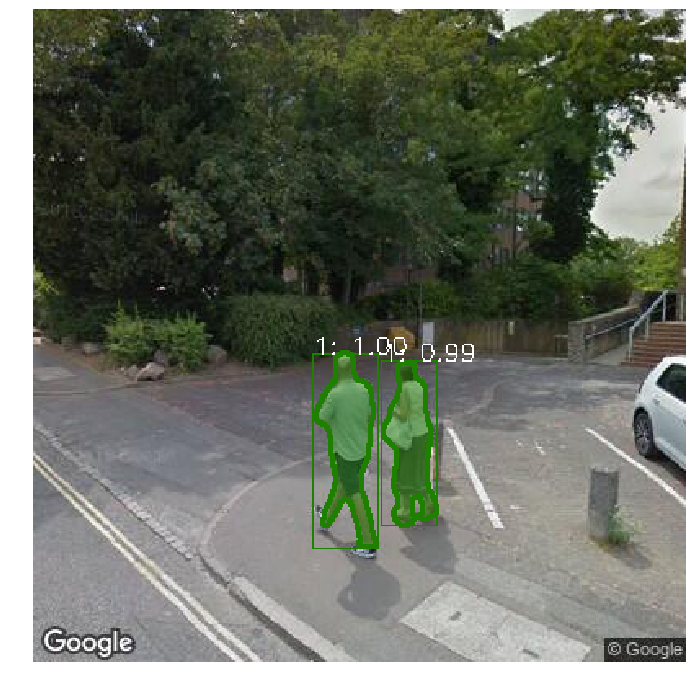

In [21]:
# compute predictions
name, image = loader.convert_image("/Users/yonghah/repo/streetscape/sample/images/image_168_240.jpg")
masked_image = counter.run_on_opencv_image(image)
imshow(masked_image)

## Batch Count

In [27]:
loader = GSVLoader(
    path="../images"
)

In [28]:
%%time
predictions = list()
generator = loader.generate()
while True:
    try: 
        filename, image = next(generator)
        print(filename)
        for score in counter.count(image, filename):
            predictions.append({'filename':filename, 'score':score})
    except StopIteration:
        break


image_162_240.jpg
image_161_180.jpg
image_162_60.jpg
image_168_180.jpg
image_162_120.jpg
image_162_0.jpg
image_167_300.jpg
image_167_0.jpg
image_168_240.jpg
image_161_120.jpg
image_161_240.jpg
image_168_60.jpg
image_168_120.jpg
image_162_180.jpg
image_161_0.jpg
image_168_300.jpg
image_161_300.jpg
image_161_60.jpg
image_167_180.jpg
image_162_300.jpg
image_167_120.jpg
image_168_0.jpg
image_167_240.jpg
image_167_60.jpg
CPU times: user 1min 32s, sys: 8.1 s, total: 1min 40s
Wall time: 1min 29s


In [32]:
predictions

[{'filename': 'image_161_180.jpg', 'score': 0.860325038433075},
 {'filename': 'image_168_180.jpg', 'score': 0.7671188712120056},
 {'filename': 'image_162_0.jpg', 'score': 0.9971248507499695},
 {'filename': 'image_162_0.jpg', 'score': 0.9839771389961243},
 {'filename': 'image_168_240.jpg', 'score': 0.9983281493186951},
 {'filename': 'image_168_240.jpg', 'score': 0.9882820248603821}]